**Applied Statistics**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate
%matplotlib inline 
plt.style.use('ggplot') 

Name:

Surname:

In [2]:
sklearn.__version__

'0.20.1'

# Assignment 3: Lasso Regression

This question involves the use of the Lasso regression on the Auto data set. In particular, we again only use **observations 1 to 200** for our analysis (you can use the data from Assignement 2). You can drop the `name`
 variable. 

Lasso performs a so called "L1 regularization" (a process of introducing additional information in order to prevent overfitting), i.e. adds penalty equivalent to absolute value of the magnitude of coefficients.

Minimization objective = RSS + α*(sum of absolute value of coefficients). 

α (alpha) provides a trade-off between balancing RSS and magnitude of coefficients. α can take various values:
  
  - α = 0: Same coefficients as simple linear regression
  - α = ∞: All coefficients zero (same logic as before)
  - 0 < α < ∞: coefficients between 0 and that of simple linear regression
  
**Tasks**

Use scikit learn to fit a Lasso regression [(see documentation)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html). 

In [3]:
# robert
PATH = './Data/' 
df = pd.read_csv(PATH + 'Auto.csv',nrows=200,usecols=['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin'])

In [4]:
# bens version
PATH = './Data/' 
df = pd.read_csv(PATH + 'Auto.csv',nrows=200,usecols=lambda x: x not in ['name'])

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [7]:
# change data type
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
year            0
origin          0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(198, 8)

In [11]:
df[['origin1','origin2','origin3']]=pd.get_dummies(df.origin)
df.drop(columns=['origin'],inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin1,origin2,origin3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


  - (a1) **Standardize** the features (module: `from sklearn.preprocessing import StandardScaler`)

  
    It is important to standardize the features by removing the mean and scaling to unit variance. The L1 (Lasso) and L2 (Ridge) regularizers of linear models assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [12]:
X = np.array(df.iloc[:,1:])
y = np.array(df.iloc[:,0])

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

  - (a2) **Split the data set** into train and test sets (use `X_train`, `X_test`, `y_train`, `y_test`), with the first 75% of the data for training and the remaining for testing. (module: `from sklearn.model_selection import train_test_split`)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.75, test_size=0.25, random_state=1337)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 9)
(50, 9)
(148,)
(50,)


  - (a3) Apply **Lasso regression** on the training set with the regularization parameter **lambda = 0.5** (module: `from sklearn.linear_model import Lasso`) and print the $R^2$-score for the training and test set. Comment on your findings.

In [16]:
clf = Lasso(alpha=0.5)
clf.fit(X_train,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
print("R^2 der Trainingsdaten: ",clf.score(X_train,y_train))
print("R^2 der Testdaten: ", clf.score(X_test,y_test))

R^2 der Trainingsdaten:  0.8246890600965796
R^2 der Testdaten:  0.8484658619497559


Mit dem trainierten Modell können wir 82.46% der Trainingsdaten erklären. Der $R^2$ Score der Testdaten beträgt 84.84%.  


  - (a4) Apply the **Lasso regression** on the training set with the following **λ parameters: (0.001, 0.01, 0.1, 0.5, 1, 2, 10)**. Evaluate the R^2 score for all the models you obtain on both the train and test sets. 

In [18]:
alphas = [0.001,0.01,0.1,0.5,1,2,10]
df_r2 = pd.DataFrame(columns=['alpha','r2_train','r2_test'])
for alpha in alphas:
    clf.set_params(alpha=alpha)
    clf.fit(X_train,y_train)
    d1 = {'alpha':alpha,'r2_train':clf.score(X_train,y_train),'r2_test':clf.score(X_test,y_test)}
    df_r2 = df_r2.append(d1,ignore_index=True)

In [19]:
df_r2

,alpha,r2_train,r2_test
0,0.001,0.842423,0.853524
1,0.010,0.842129,0.858528
2,0.100,0.839035,0.868290
3,0.500,0.824689,0.848466
4,1.000,0.789984,0.801013
5,2.000,0.691310,0.678166
6,10.000,0.000000,-0.088482


Anhand der obigen Tabelle ist zu erkennen, dass bei großen Alphas das Modell sehr schlecht wird und kaum noch Daten eklären kann. Wird das Alpha verringert wird das Modell immer besser bis zum Wert $alpha = 0.100$. Beim nächsten Wert ($alpha = 0.010$) ist das Modell bereits im Overfitting Bereich, da der $R^2$ Score der Testdaten wieder schlechter wird.

  - (a5) **Plot** all values for both data sets (train and test $R^2$-values) as a function of λ. Comment on your findings.

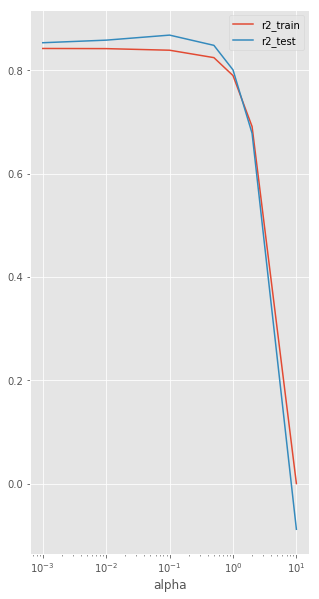

In [25]:
#ben
df_r2.set_index('alpha').plot(logx=True,figsize=(5,10));

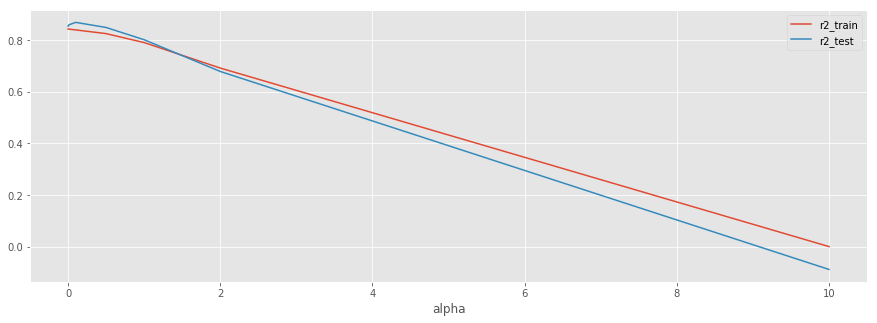

In [23]:
df_r2.set_index('alpha').plot(figsize=(15,5));

Mit steigendem Alpha wird das $R^2$ der Trainigsdaten immer schlechter. Im Bereich zwischen $alpha = 0.001$ und $alpha = 0.100$ ist es sehr interessant, dass das Modell die Testdaten besser erklären kann, als die Trainingsdaten, da der $R^2$ Score der Testdaten höher ist. Ebenfalls in diesem Bereich ist ein leichtes Overfitting des Modells zu sehen bei $X=10^-2$ fällt der $R^2$ Score der Testdaten leicht wenn das Alpha erhöht wird.

  - (a6) Store your test data results in a DataFrame and indentify the lambda where the $R^2$ has it's **maximum value** in the **test data**. Fit a Lasso model with this lambda parameter (use the training data) and obtain the corresponding **regression coefficients**. Furthermore, obtain the **mean squared error** for the test data of this model (module: `from sklearn.metrics import mean_squared_error`)

In [26]:
clf.set_params(alpha = df_r2[df_r2.r2_test==df_r2.r2_test.max()]['alpha'].values.item())
clf.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
pd.Series(clf.coef_, df.columns[1:])

cylinders      -0.000000
displacement   -0.000000
horsepower     -0.325076
weight         -4.173150
acceleration   -0.000000
year            0.532656
origin1        -0.978149
origin2         0.000000
origin3         0.000000
dtype: float64

In [33]:
mean_squared_error(y_test,clf.predict(X_test))

4.39890743019928

  - (a7) Evaluate the performance of a **Lasso regression** for different regularization parameters λ using **5-fold cross validation** on the training set (module: `from sklearn.model_selection import cross_val_score`) and plot the cross-validation (CV) $R^2$ scores of the training and test data as a function of λ.
  

    Use the following lambda parameters: 
    l_min = 0.05 
    l_max = 0.2
    l_num = 20
    lambdas = np.linspace(l_min,l_max, l_num)

In [90]:
alphas = np.linspace(0.05, 0.2, 20)
df_cv = pd.DataFrame(columns=['alpha','mean_r2_train','mean_r2_validate'])
for alpha in alphas:
    clf_cv = Lasso(alpha=alpha)
    scores = cross_validate(clf_cv, X_train, y_train, cv=5, return_train_score=True)
    d1 = {'alpha':alpha,'mean_r2_train':scores['train_score'].mean(),'mean_r2_validate':scores['test_score'].mean()}
    df_cv = df_cv.append(d1, ignore_index=True)

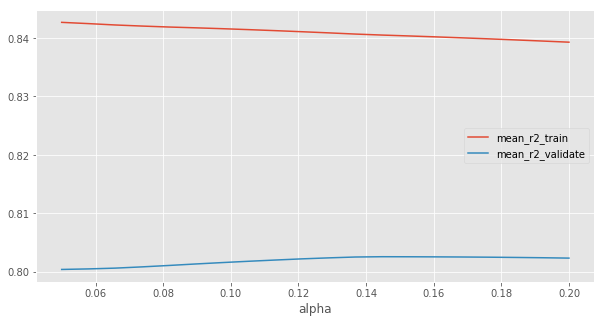

In [94]:
df_cv.set_index('alpha').plot(figsize=(10,5));

In [97]:
df_cv[df_cv.mean_r2_validate==df_cv.mean_r2_validate.max()]

,alpha,mean_r2_train,mean_r2_validate
12,0.144737,0.840524,0.802546


Das $\lambda$ mit dem größten $R^2$ liegt bei $0.144737$.

   - (a8) Finally, store your test data results in a DataFrame and indentify the lambda where the $R^2$ has it's **maximum value** in the **test data**. Fit a Lasso model with this lambda parameter (use the training data) and obtain the corresponding **regression coefficients**. Furthermore, obtain the **mean squared error** for the test data of this model (module: `from sklearn.metrics import mean_squared_error`)

In [98]:
clf_final = Lasso(alpha = 0.144737)
clf_final.fit(X_train, y_train)

Lasso(alpha=0.144737, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
pd.Series(clf_final.coef_, df.columns[1:])

cylinders      -0.000000
displacement   -0.000000
horsepower     -0.330119
weight         -4.147956
acceleration   -0.000000
year            0.491865
origin1        -0.948285
origin2         0.000000
origin3         0.000000
dtype: float64

In [101]:
mean_squared_error(y_test,clf_final.predict(X_test))

4.441364160565874